In [37]:
# Define the path to the sample data file:

SAMPLE_DATA_FILE_PATH: str = "20250802_GI5539.csv"

In [38]:
# Import modules:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Read the sample data:

sample_data_df: pd.DataFrame = pd.read_csv(
    SAMPLE_DATA_FILE_PATH,
    sep=",",
    dtype={"illuminance_lux": float, "resistance_ohm": float},
)

sample_data_df.describe()

,resistance_ohm,illuminance_lux
count,2.000000e+01,20.000000
mean,6.898000e+05,404.245000
std,5.086590e+05,386.465716
min,1.850000e+05,46.400000
25%,2.635000e+05,89.550000
50%,4.470000e+05,300.500000
75%,9.942500e+05,654.750000
max,1.643000e+06,1291.000000


In [40]:
# Calculate the logarithm of the data:

sample_data_df["log_resistance_ohm"] = np.log(sample_data_df["resistance_ohm"])
sample_data_df["log_illuminance_lux"] = np.log(sample_data_df["illuminance_lux"])
sample_data_df.head()

,resistance_ohm,illuminance_lux,log_resistance_ohm,log_illuminance_lux
0,1643000.0,46.4,14.312034,3.837299
1,1614000.0,49.9,14.294226,3.910021
2,1492000.0,53.6,14.215628,3.981549
3,1364000.0,63.2,14.125932,4.146304
4,1112000.0,77.4,13.921671,4.348987


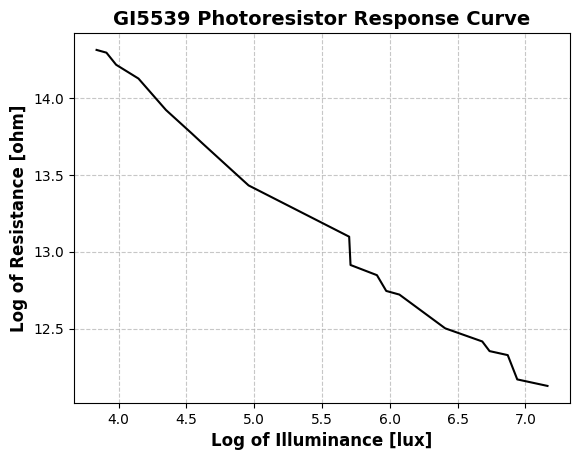

In [41]:
# Plot the raw data:

plt.plot(
    sample_data_df["log_illuminance_lux"],
    sample_data_df["log_resistance_ohm"],
    color="black",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Log of Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Log of Resistance [ohm]", fontsize=12, color="black", fontweight="bold")
plt.title(
    "GI5539 Photoresistor Response Curve", fontsize=14, color="black", fontweight="bold"
)
plt.show()

In [42]:
# Linear regression: Calculate the slope and intercept:

gamma, log_r0 = np.polyfit(
    sample_data_df["log_illuminance_lux"], sample_data_df["log_resistance_ohm"], 1
)
r0 = np.exp(log_r0)

print(f"Gamma: {gamma}")
print(f"R0: {r0}")

Gamma: -0.6687810279258103
R0: 20431561.35272567


In [43]:
# Define the photoresistor function:


def resistance(lux: float) -> float:
    """
    Calculate the resistance of a photoresistor.

    Args:
        lux: The illuminance in lux.

    Returns:
        The resistance in ohms.
    """

    return r0 * (lux**gamma)

In [44]:
# Compute the calculated resistance:

sample_data_df["calculated_resistance_ohm"] = sample_data_df["illuminance_lux"].apply(
    lambda x: resistance(x)
)
sample_data_df["log_calculated_resistance_ohm"] = np.log(
    sample_data_df["calculated_resistance_ohm"]
)
sample_data_df.head()

,resistance_ohm,illuminance_lux,log_resistance_ohm,log_illuminance_lux,calculated_resistance_ohm,log_calculated_resistance_ohm
0,1643000.0,46.4,14.312034,3.837299,1.569517e+06,14.266278
1,1614000.0,49.9,14.294226,3.910021,1.495010e+06,14.217644
2,1492000.0,53.6,14.215628,3.981549,1.425177e+06,14.169807
3,1364000.0,63.2,14.125932,4.146304,1.276486e+06,14.059622
4,1112000.0,77.4,13.921671,4.348987,1.114673e+06,13.924072


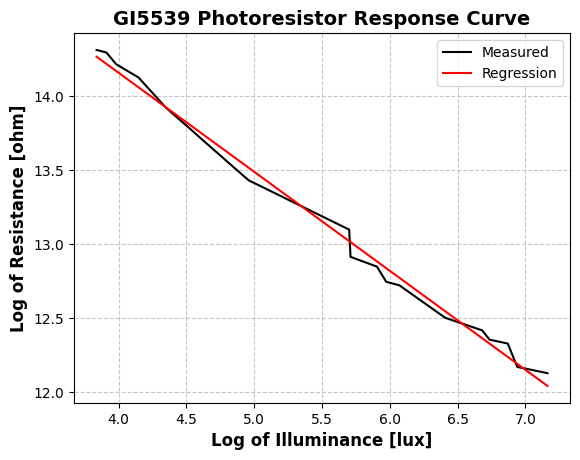

In [45]:
# Compare the calculated resistance with the measured resistance: Logarithmic values

plt.plot(
    sample_data_df["log_illuminance_lux"],
    sample_data_df["log_resistance_ohm"],
    color="black",
    label="Measured",
)
plt.plot(
    sample_data_df["log_illuminance_lux"],
    sample_data_df["log_calculated_resistance_ohm"],
    color="red",
    label="Regression",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Log of Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Log of Resistance [ohm]", fontsize=12, color="black", fontweight="bold")
plt.title(
    "GI5539 Photoresistor Response Curve", fontsize=14, color="black", fontweight="bold"
)
plt.legend()
plt.show()

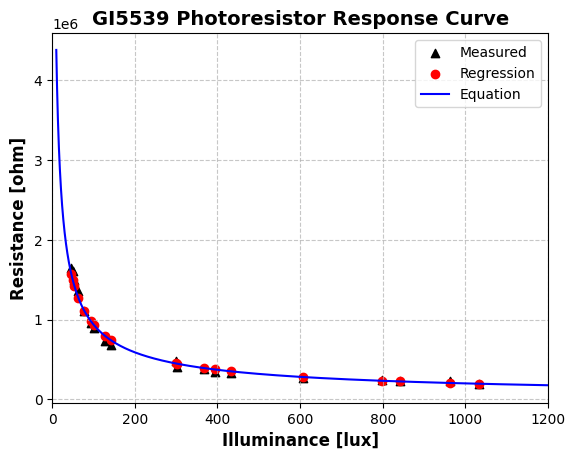

In [46]:
# Compare the calculated resistance with the measured resistance: Normal data in low range

max_illuminance_lux = 1200

illuminance_lux = np.arange(10, max_illuminance_lux, 0.1)
resistance_ohm = [resistance(x) for x in illuminance_lux]

plt.scatter(
    sample_data_df["illuminance_lux"],
    sample_data_df["resistance_ohm"],
    color="black",
    label="Measured",
    marker="^",  # Triangle marker
)
plt.scatter(
    sample_data_df["illuminance_lux"],
    sample_data_df["calculated_resistance_ohm"],
    color="red",
    label="Regression",
)
plt.plot(illuminance_lux, resistance_ohm, color="blue", label="Equation")
plt.xlim(0, max_illuminance_lux)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Resistance [ohm]", fontsize=12, color="black", fontweight="bold")
plt.title(
    "GI5539 Photoresistor Response Curve", fontsize=14, color="black", fontweight="bold"
)
plt.legend()
plt.show()

In [58]:
# Calculate the resistance at 750 lux

resistance_at_750_lux = resistance(750)
print(f"Resistance at 750 lux: {resistance_at_750_lux / 1000} kohm")

# Calculate the voltage divider resistance:

vs = 3.3  # Voltage source for the voltage divider from the ESP32
voltage_at_750_lux = 3.0

r2 = resistance_at_750_lux * voltage_at_750_lux / (vs - voltage_at_750_lux)
print(f"R2: {r2 / 1000} kohm")

Resistance at 750 lux: 244.07040906115265 kohm
R2: 2440.7040906115276 kohm


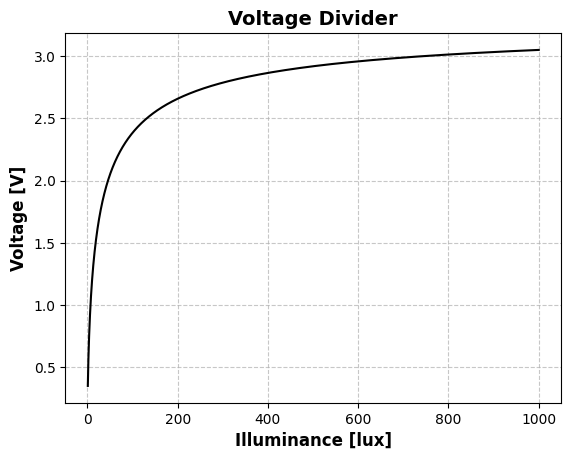

Resistance at 750 lux: 244070.40906115263
Voltage at 750 lux: 3.0


In [59]:
# Plot the voltage divider vs illuminance

max_illuminance_lux = 1000

illuminance_lux = np.arange(1, max_illuminance_lux, 0.1)
resistance_ohm = [resistance(x) for x in illuminance_lux]
voltage_v = [vs * r2 / (r2 + r) for r in resistance_ohm]

plt.plot(
    illuminance_lux,
    voltage_v,
    color="black",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Voltage [V]", fontsize=12, color="black", fontweight="bold")
plt.title("Voltage Divider", fontsize=14, color="black", fontweight="bold")
plt.show()

resistance_at_750_lux = resistance(750)
voltage_at_750_lux = vs * r2 / (r2 + resistance_at_750_lux)

print(f"Resistance at 750 lux: {resistance_at_750_lux}")
print(f"Voltage at 750 lux: {voltage_at_750_lux}")